# 2020 출제문제 수정본

##### 문제1. 주어진 PGATour.xlsx 파일은 프로골프 선수들의 역대 상금, 그리고 비거리와 점수평균 등 경기 내 통계값을 정리한 데이터이다.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

%precision 3

'%.3f'

In [ ]:
tour = pd.read_excel('./PGATour.xlsx')
tour.head()

,Rank,Player,Money ($),Scoring Average,DrDist,DrAccu,GIR
0,1,Vijay Singh,6601.094,70.27,297.8,59.45,68.45
1,2,Phil Mickelson,5188.875,70.28,295.7,55.27,65.81
2,3,Sergio Garcia,4858.224,70.60,294.6,59.39,67.06
3,4,Kenny Perry,4663.794,70.21,296.0,61.97,67.47
4,5,Anthony Kim,4656.265,70.22,300.9,58.34,65.78


1) 선수들의 상금 (데이터의 Money($) 열) 데이터를 불러온 뒤 히스토그램을 그리시오. (단, 계급은 0부터 8000까지 1000간격으로 총 8개로 나눔)

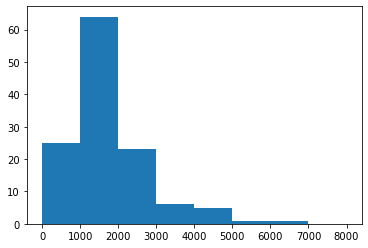

In [ ]:
money = tour['Money ($)']
plt.hist(money, bins = np.arange(0,9000,1000))
plt.show()

2) 선수들의 상금의 히스토그램과 누적도수의 꺽은선그래프(ogive)를 함께 그리시오. (단, 계급은 0부터 8000까지 1000 간격으로 총 20개로 나눔. Ogive의 점 위치는 계급의 시작값으로 하세요.)

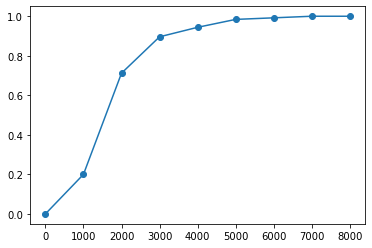

In [ ]:
x_value = np.arange(0, 9000, 1000)
hist, edges = np.histogram(money, bins=x_value)
y_value = hist / sum(hist)
y_value = np.cumsum(y_value).tolist()
y_value.insert(0,0)
plt.plot(x_value, y_value, marker='o')
plt.show()

##### 문제2. 주어진 SalesSalary.xlsx 파일은 직원들의 연봉과 직책, 경력을 정리한 데이터이다. (단, 파일에 들은 데이터가 직원 전체, 즉 모집단이라 가정한다.)

In [ ]:
salary_pd = pd.read_excel('./SalesSalary.xlsx')
salary_pd.head()

,Observation,Salary ($),Position,Experience
0,1,53938,Inside,Medium
1,2,52694,Inside,Medium
2,3,70515,Outside,Low
3,4,52031,Inside,Medium
4,5,62283,Outside,Low


5) 연봉 (데이터의 Salary ($) 열) 의 모분산을 구하시오.

In [ ]:
salary = salary_pd['Salary ($)']
p_var = salary.var(ddof=0)
p_var

116497858.266

6) Seed를 2023으로 고정하고 (코드 안에 random.seed(2023)라고 입력한 부분), 표본크기가 20인 표본의 표본평균을 구하시오.

In [ ]:
np.random.seed(2023)
sample = np.random.choice(salary, 20)
s_mean = np.mean(sample)
s_mean

64062.250

7) 모집단평균에 대한 95% 신뢰구간을 구하시오.

In [ ]:
n = 20
rv = stats.norm()
lcl = s_mean - rv.isf(0.025) * np.sqrt(p_var/n)
ucl = s_mean - rv.isf(0.975) * np.sqrt(p_var/n)

lcl, ucl

(59331.913, 68792.587)

# 2021 출제문제 수정본

##### 문제1. 주어진 Morningstar.xlsx 파일은 펀드들의 순자산가치, 5년 간 평균 수익률, 운용 수수료 등의 통계를 정리한 데이터입니다. 해당 데이터를 이용해 제시된 조건에 맞추어 코드를 작성하세요.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%precision 3

'%.3f'

In [2]:
df = pd.read_excel('./Morningstar.xlsx')
df.head()

,Fund Name,Net Asset Value,5 Year Average Return,Expense Ratio
0,American Century Intl. Disc,14.37,30.53,1.41
1,American Century Tax-Free Bond,10.73,3.34,0.49
2,American Century Ultra,24.94,10.88,0.99
3,Artisan Small Cap,16.92,15.67,1.18
4,Brown Cap Small,35.73,15.85,1.20


1) 순자산가치와 5년간 평균 수익률 간의 관계를 보여주는 산점도를 그리세요.

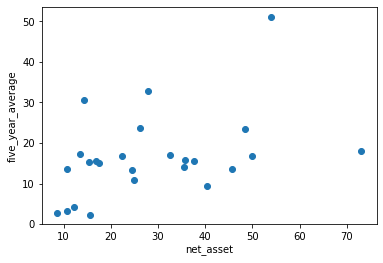

In [8]:
plt.scatter(df['Net Asset Value'], df['5 Year Average Return'])
plt.xlabel('net_asset')
plt.ylabel('five_year_average')
plt.show()

##### 문제2.주어진 MetAreas.xlsx 파일은 미국 주요 도시들의 평점(Rating)을 모은 것입니다.(단, 파일에 들은 데이터가 미국 도시들의 전부, 즉 모집단이라 가정)

In [10]:
df = pd.read_excel('./MetAreas.xlsx')
print(df.head())
rating = np.array(df['Rating'])
rating[:5]

  Metropolitan Area  Rating
0        Albany, NY   64.18
1   Albuquerque, NM   66.16
2      Appleton, WI   60.56
3       Atlanta, GA   69.97
4        Austin, TX   71.48


array([64.18, 66.16, 60.56, 69.97, 71.48])

1) 순자산가치와 5년간 평균 수익률 간의 관계를 보여주는 산점도를 그리세요.

In [11]:
p_var = rating.var(ddof=0)
p_mean = rating.mean()

print(p_mean, p_var)

67.5992 16.33376736


2) Seed를 2023 으로 고정하고, 표본크기가 10인 표본의 표본평균과 표본분산을 구하세요.

In [12]:
np.random.seed(2023)
n = 10
sample = np.random.choice(rating, n)
s_var = sample.var(ddof=1)
s_mean = sample.mean()

print(s_mean, s_var)

67.499 13.8214988888889


3) 표본크기 10인 표본 1000개를 추출하여 구한 표본평균의 히스토그램을 그리세요. (조건: 계급 간격은 1로, 가장 작은 계급의 하한을 60, 가장 큰 계급의 상한을 80으로 하세요)

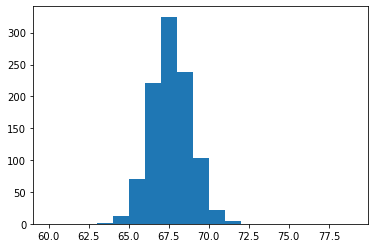

In [13]:
sample = []
means = []

for k in np.arange(0, 1000):
    for i in np.arange(0, 10):
        n = np.random.choice(rating)
        sample.append(n)
    means.append(np.mean(sample))
    sample = []
    
plt.hist(means, bins=np.arange(60, 80, 1))
plt.show()

4) 모집단평균에 대한 95% 신뢰구간을 구하세요. 표본크기는 위와 같이 10입니다.

In [14]:
rv = stats.norm()

lcl = s_mean - rv.isf(0.025) * np.sqrt(p_var/n)
ucl = s_mean - rv.isf(0.975) * np.sqrt(p_var/n)

lcl, ucl

(66.525, 68.473)

##### 문제3. 주어진 Coffee.xlsx 파일은 한 커피 공장에서 생산된 커피 한 봉지의 무게(Weight) 표본 데이터입니다.

In [15]:
df = pd.read_excel('./Coffee.xlsx')
coffee = np.array(df['Weight'])
coffee

array([3.15, 2.76, 3.18, 2.77, 2.86, 2.66, 2.86, 2.54, 3.02, 3.13, 2.94,
       2.74, 2.84, 2.6 , 2.94, 2.93, 3.18, 2.95, 2.86, 2.91, 2.96, 3.14,
       2.65, 2.77, 2.96, 3.1 , 2.82, 3.05, 2.94, 2.82, 3.21, 3.11, 2.9 ,
       3.05, 2.93, 2.89])

1) 이 커피공장에서는 커피 한 봉지의 무게를 3kg 에 맞추려 합니다. 표본 데이터를 이용하여 적합한 가설을 세워 유의수준 5% 로 검정하세요.

$$ 귀무가설 : 커피 한 봉지의 평균 무게는 3kg 이다. $$

$$ H_0 : \mu = 3 $$

2. 조건 1. 귀무가설을 글이나 수식으로 작성입력하세요

In [16]:
def pmean_test(sample, mean0, alpha=0.05):
    s_mean = np.mean(sample)
    u_var = np.var(sample, ddof=1)
    n = len(sample)
    rv = stats.t(df=n-1)
    
    t = (s_mean - mean0) / np.sqrt(u_var/n)
    
    if t < 0:
        p_value = rv.cdf(t) * 2
    else:
        p_value = rv.sf(t) * 2
        
    if p_value < alpha:
        print(f'p_value = {p_value:.4f} < alpha = {alpha:.2f} 입니다.\
            \n따라서 귀무가설을 기각합니다.')
    else:
        print(f'p_value = {p_value:.4f} >= alpha = {alpha:.2f} 입니다.\
            \n따라서 귀무가설을 기각하지 않습니다.')
        
pmean_test(coffee, 3)

p_value = 0.0078 < alpha = 0.05 입니다.            
따라서 귀무가설을 기각합니다.


3) 위 가설 검정결과를 문제상황에 적용하여 구체적으로 설명하고, 그 내용을 텍스트로 작성, 입력하세요

(커피 한 봉지의 평균 무게는 3kg 이라는 귀무가설이 기각되었으므로) 이 커피 공장에서는 커피 한 봉지의 평균 무게를 3kg에 맞추지 못하고 있다.